**NEWS HEADLINES DATASET FOR SARCASM DETECTION PART 1**

**What we have to do?** \
    **We have a dataset of sarcastic headlines from two news websites** \
    **There is each dataset, which consists of three attributes:** \
        - is_sarcastic: 1 if the dataset is sarcastic, 0 otherwise\
        - headline: the headline of the news article\
        - article_link: Link to the original news article
        
  **We need to find out which news items are sarcastic and which are not.**\
  **For this task we need to work with the following plan:**\
  
    >>> Read and clean the data 
    >>> Find and visualise most common words 
    >>> Identify and visualise stop words 
    >>> Preprocess text 
    >>> Define classification models 
    >>> Retrieve and save the best model 

   

**Import library necessary**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import nltk
#nltk.download()

**Reading and Cleaning the Data**

In [4]:
# read the file
data = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [5]:
# view the data
data.head(100)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
95,0,number of homeless students in america is risi...,https://www.huffingtonpost.com/entry/homeless-...
96,1,report: majority of instances of people gettin...,https://www.theonion.com/report-majority-of-in...
97,1,groundbreaking study finds gratification can b...,https://www.theonion.com/groundbreaking-study-...
98,0,nick cannon responds to mariah carey's engagem...,https://www.huffingtonpost.com/entry/nick-cann...


In [6]:
# shape of the data
data.shape

(28619, 3)

In [7]:
data_len = data['headline'].apply(lambda x: len(x.split(' '))).sum()
print(f'We have {data_len} words in the headline')

We have 287674 words in the headline


In [8]:
# check the columns names
data.columns

Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')

In [9]:
# check the data types in the columns
data.dtypes

is_sarcastic     int64
headline        object
article_link    object
dtype: object

In [10]:
#checking the unique values in 'is_sarcastic' column
data.is_sarcastic.unique()

array([1, 0], dtype=int64)

In [11]:
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)

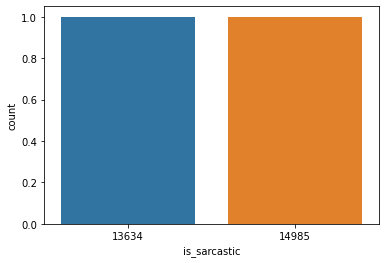

In [12]:
#checking the value counts in 'is_sarcastic' column
data.is_sarcastic.value_counts()
sns.countplot(data['is_sarcastic'].value_counts())
plt.show()

In [13]:
# check the null values in data
data.isna().sum() 

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [14]:
#drop 'article_link' column
data = data.drop('article_link', axis=1)

In [15]:
#ckeck the data
data.head(10)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
5,0,my white inheritance
6,0,5 ways to file your taxes with less stress
7,1,richard branson's global-warming donation near...
8,1,shadow government getting too large to meet in...
9,0,lots of parents know this scenario


In [16]:
#import necessary library
import re
from nltk.corpus import stopwords

set_stopwords = set(stopwords.words("english"))


def clean_txt(text): # define the fuction with tokenization/string cleaning for all datasets 
                        
    text = re.sub(r"[^A-Za-z,!?]", " ", text)     
    text = re.sub(r'\[[^]]*\]'," ", text) 
    text = re.sub(r"\'s", "", text) 
    text = re.sub(r"\'t", "", text ) 
    text = re.sub(r"\'re", "",text) 
    text = re.sub(r"\'d", "", text) 
    text = re.sub(r"\'ll", " ",text) 
    text = re.sub(r",", " ", text) 
    text = re.sub(r"\(", " ", text) 
    text = re.sub(r"\)", " ", text) 
    text = re.sub(r"\'", " ", text)
    text = re.sub(r"aa", "", text)
    text = re.sub(r"zz", "", text)
    text = re.sub(r"[0-9]", ' ', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in set_stopwords)
    return text

data['headline'] = data['headline'].apply(clean_txt)

In [17]:
data_clean_len = data['headline'].apply(lambda x: len(x.split(' '))).sum() 
print(f'After text cleaning we have only {data_clean_len} words to work with')

After text cleaning we have only 205988 words to work with


*Most common words*

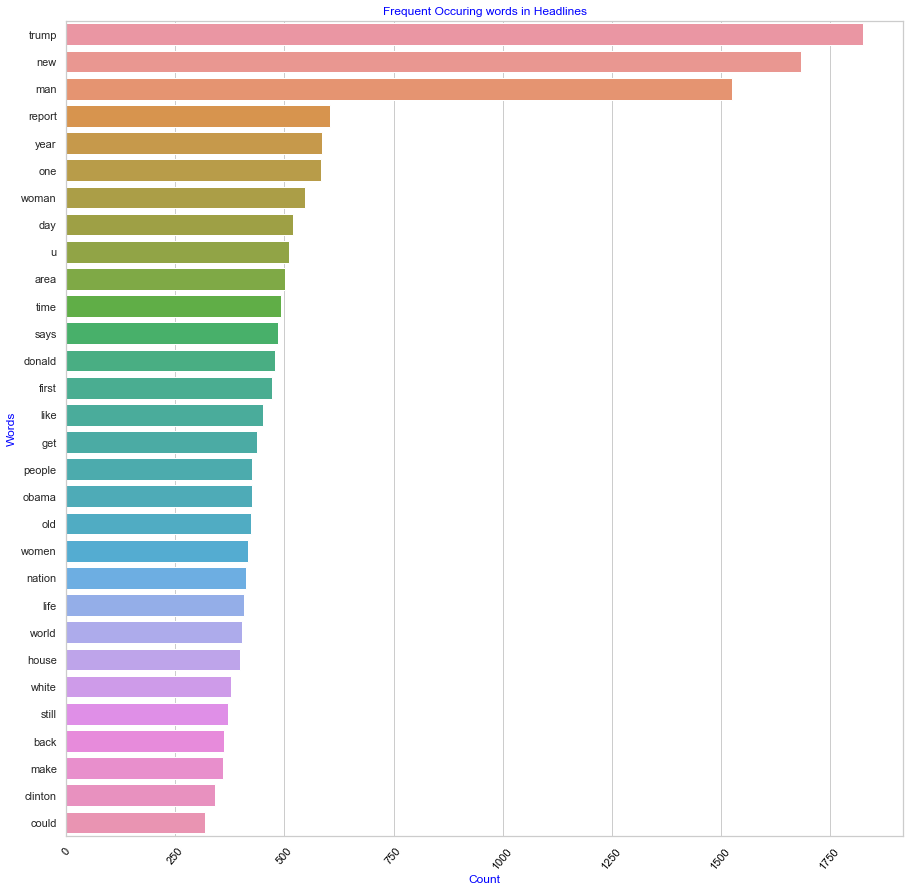

In [18]:
from collections import Counter #import Counter for finding most common words
import seaborn as sns #import searbon for vizualization result

text = data['headline']
words = text.str.split(expand=True).unstack()
result_count = Counter(words).most_common()
result_df = pd.DataFrame(result_count).reset_index().drop(0) #converting to Dataframe and drop the Nones values
#result_df
#vizualize result
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 15)) 
sns.barplot(y=result_df[0][0:30], x=result_df[1][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring words in Headlines", color="blue") 
plt.xticks(rotation=50);
ax.tick_params(axis='x', colors='black')
plt.show()

**Finding most common words in 'is_sarcastic' column**

In [19]:
#create DataFrame for sarcastic words 
sarcastic = pd.DataFrame(data[data['is_sarcastic']==1]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

In [20]:
#create DataFrame for non_sarcastic words 
non_sarcastic = pd.DataFrame(data[data['is_sarcastic']==0]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

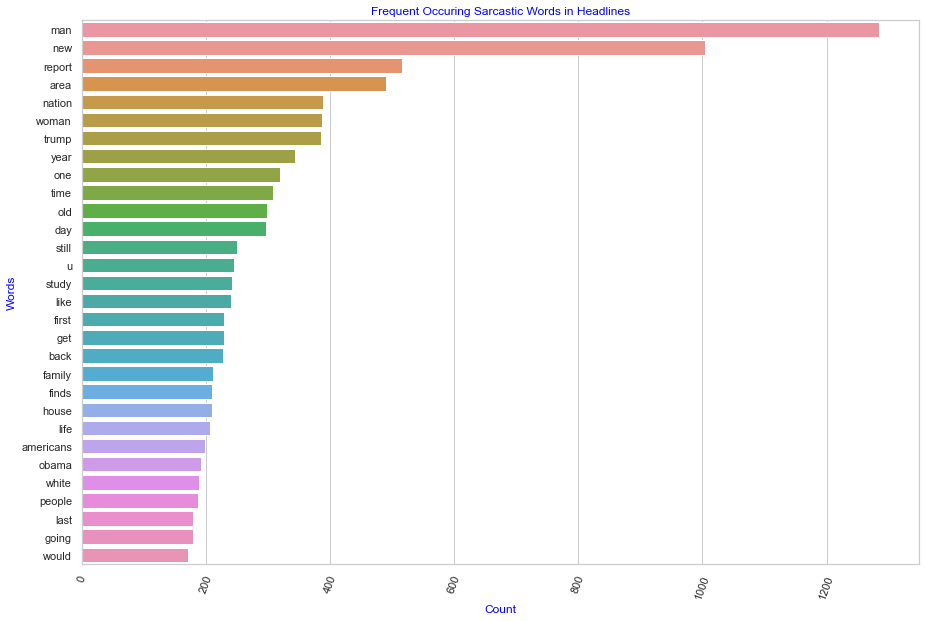

In [21]:
#vizualize result
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 10)) 
sns.barplot(y=sarcastic['index'][0:30], x=sarcastic[0][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring Sarcastic Words in Headlines", color="blue") 
plt.xticks(rotation=70);
plt.show()

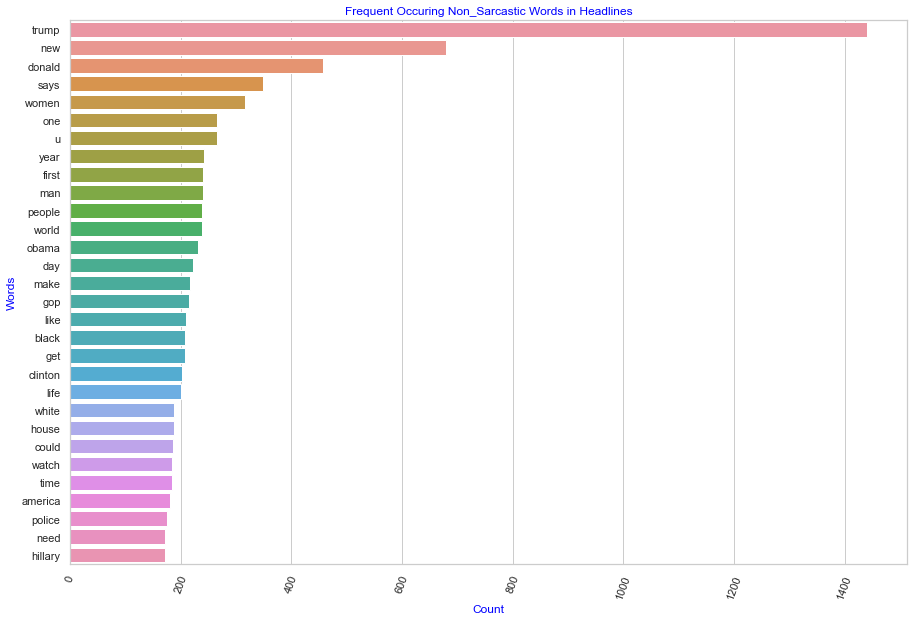

In [22]:
#vizualize result
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 10)) 
sns.barplot(y=non_sarcastic['index'][0:30], x=non_sarcastic[0][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring Non_Sarcastic Words in Headlines", color="blue") 
plt.xticks(rotation=70);
plt.show()

**WordCloud Vizualization with StopWords**

In [23]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

sarcasctic_2 = [every_word.lower() for every_word in sarcastic['index']]

sarc_nonstop = [word for word in sarcasctic_2 if word not in stopwords]

non_sarcasctic_2 = [every_word.lower() for every_word in non_sarcastic['index']]

non_sarc_nonstop = [word for word in non_sarcasctic_2 if word not in stopwords]


In [24]:
#pip install wordcloud

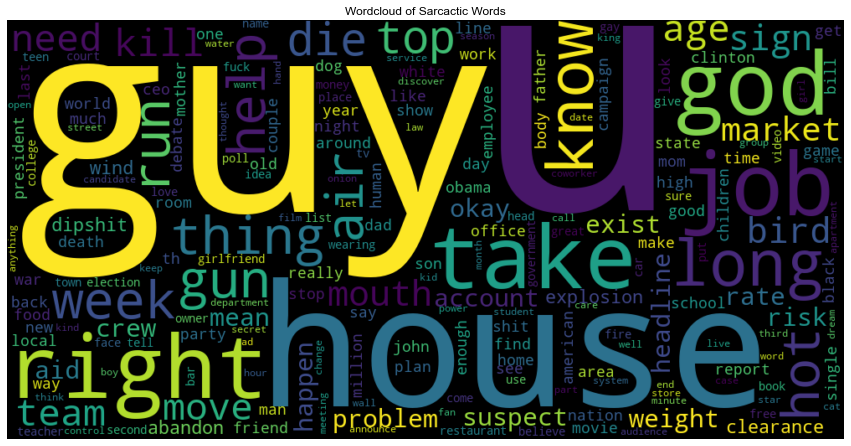

In [25]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1000, height=500,
                      max_words=300, min_font_size = 10,
                      background_color="black",
                      stopwords = stopwords, 
                      ).generate(' ' .join(word for word in sarc_nonstop))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud of Sarcactic Words', color="black")
plt.axis("off")
plt.show()

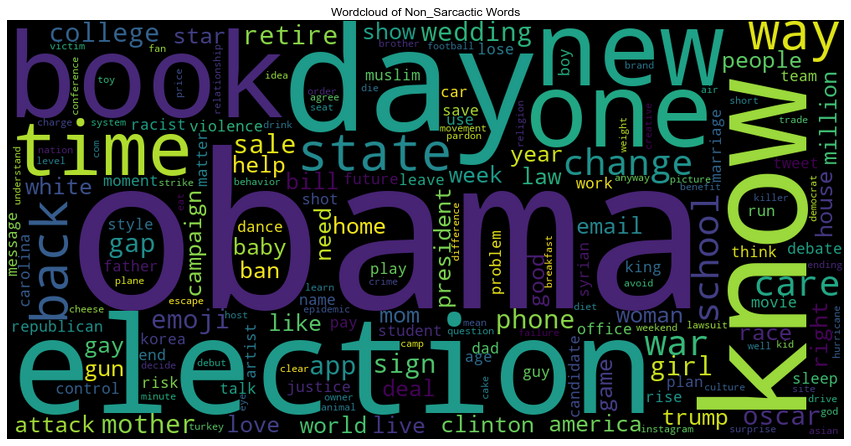

In [26]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1000, height=500,
                      max_words=300, min_font_size = 10,
                      background_color="black",
                      stopwords = stopwords,
                      ).generate(' ' .join(word for word in non_sarc_nonstop))

plt.imshow(wordcloud, interpolation='spline36')
plt.title('Wordcloud of Non_Sarcactic Words', color="black")
plt.axis("off")
plt.show()

***Text pre-processing***

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(data['headline']).toarray()
y = data.iloc[:, -1].values
cv.get_feature_names()
df = pd.DataFrame(X_cv, columns=cv.get_feature_names())
df

,ab,abandon,abandoned,abandoning,abandons,abayas,abbas,abbey,abbi,abby,...,zookeeper,zoolander,zoologist,zoologists,zoomed,zoroastrianism,zsa,ztari,zucker,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Split text to train and test**

In [28]:
from sklearn.model_selection import train_test_split # import library for train_test_split
X = text
y = data.is_sarcastic
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

**Multinomial Naive Bayes Classifier**

In [29]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import f1_score, accuracy_score, classification_report


pipe1 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1,)), 
                   ('MNB', MultinomialNB()),])

parameters1 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'MNB__alpha': [1.0],
                'MNB__fit_prior': [True]}
gridMNB = GridSearchCV(pipe1, parameters1 ,cv=5)
gridMNB.fit(X_train, y_train)

%time y_pred1 = gridMNB.predict(X_test)

print('MNB_accuracy: %s' % accuracy_score(y_pred1, y_test))
print(classification_report(y_test, y_pred1))

Wall time: 316 ms
MNB_accuracy: 0.8074772886093641
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4560
           1       0.79      0.80      0.80      4026

    accuracy                           0.81      8586
   macro avg       0.81      0.81      0.81      8586
weighted avg       0.81      0.81      0.81      8586



**Stochastic Gradient Descent Classifier**

In [30]:
from sklearn.linear_model import SGDClassifier

pipe2 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1)),
                  ('tfidf', TfidfTransformer()),
                  ('SGD', SGDClassifier(loss='hinge', penalty='l2',alpha=0.0001,shuffle=True,
                                      learning_rate='optimal',random_state=None, max_iter=100,)),
                   ])
parameters2 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'SGD__alpha': [0.0001],
                'SGD__max_iter': [1000]}

              
gridSGD = GridSearchCV(pipe2, parameters2 ,cv=5)
gridSGD.fit(X_train, y_train)

%time y_pred2 = gridSGD.predict(X_test)

print('SGD_accuracy: %s' % accuracy_score(y_pred2, y_test))
print(classification_report(y_test, y_pred2))                                     

Wall time: 185 ms
SGD_accuracy: 0.8009550430934079
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      4560
           1       0.80      0.77      0.78      4026

    accuracy                           0.80      8586
   macro avg       0.80      0.80      0.80      8586
weighted avg       0.80      0.80      0.80      8586



**KNeighbors Classifier**

In [31]:
from sklearn.neighbors import KNeighborsClassifier

pipe3 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1)),
                  ('tfidf', TfidfTransformer()),
                  ('KN', KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')),
                   ])

                
parameters3 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'KN__n_neighbors': [5],
                    'KN__p': [2],
                    'KN__leaf_size': [20]
              }


gridKN = GridSearchCV(pipe3, parameters3 ,cv=5)
gridKN.fit(X_train, y_train)

%time y_pred3 = gridKN.predict(X_test)

print('KN_accuracy: %s' % accuracy_score(y_pred3, y_test))
print(classification_report(y_test, y_pred3))

Wall time: 6.02 s
KN_accuracy: 0.6928721174004193
              precision    recall  f1-score   support

           0       0.65      0.91      0.76      4560
           1       0.81      0.45      0.58      4026

    accuracy                           0.69      8586
   macro avg       0.73      0.68      0.67      8586
weighted avg       0.73      0.69      0.67      8586



**Logistic Regression Classifier**

In [32]:
from sklearn.linear_model import LogisticRegression

pipe4 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1)),
                ('tfidf', TfidfTransformer()),
                ('LR', LogisticRegression(penalty='l2',C=1,random_state=None,solver='liblinear', max_iter=100,)),
               ])

parameters4 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'LR__C': [1, 5, 10,20,40],
                    'LR__tol': [0.0001],
                  'LR__max_iter': [100]
              }

gridLR = GridSearchCV(pipe4, parameters4 ,cv=5)
gridLR.fit(X_train, y_train)

%time y_pred4 = gridLR.predict(X_test)

print('LR_accuracy: %s' % accuracy_score(y_pred4, y_test))
print(classification_report(y_test, y_pred4))

Wall time: 188 ms
LR_accuracy: 0.8074772886093641
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4560
           1       0.79      0.81      0.80      4026

    accuracy                           0.81      8586
   macro avg       0.81      0.81      0.81      8586
weighted avg       0.81      0.81      0.81      8586



**Decision Tree Classifier**

In [33]:
from sklearn.tree import DecisionTreeClassifier

pipe5 = Pipeline([('vectr', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('DTree', DecisionTreeClassifier(criterion='gini', splitter='best',random_state=0 ,min_samples_leaf=1)),
               ])

parameters5 = {'vectr__ngram_range': [(1,1),(1,2)],
                'DTree__criterion': ['gini'],
              'DTree__min_samples_leaf': [1]
              }

gridDtree = GridSearchCV(pipe5, parameters5 ,cv=5)
gridDtree.fit(X_train, y_train)

%time y_pred5 = gridDtree.predict(X_test)

print('Dtree_accuracy: %s' % accuracy_score(y_pred5, y_test))
print(classification_report(y_test, y_pred5))

Wall time: 173 ms
Dtree_accuracy: 0.7286279990682506
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      4560
           1       0.72      0.70      0.71      4026

    accuracy                           0.73      8586
   macro avg       0.73      0.73      0.73      8586
weighted avg       0.73      0.73      0.73      8586



**Random Forest Classifier**

In [34]:
from sklearn.ensemble import RandomForestClassifier

pipe6 = Pipeline([('vectr', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('RF', RandomForestClassifier(n_estimators=100,criterion='gini', max_features='auto',
                                               random_state=None ,min_samples_leaf=1)),
               ])

parameters6 = {'vectr__ngram_range': [(1,1),(1,2)],
               'RF__n_estimators': [100],
                'RF__criterion': ['gini'],
                  'RF__min_samples_leaf': [1]
              }

gridRF = GridSearchCV(pipe6, parameters6 ,cv=5)
gridRF.fit(X_train, y_train)

%time y_pred6 = gridRF.predict(X_test)

print('RF_accuracy: %s' % accuracy_score(y_pred6, y_test))
print(classification_report(y_test, y_pred6))

Wall time: 2.12 s
RF_accuracy: 0.7664803167947822
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      4560
           1       0.79      0.68      0.73      4026

    accuracy                           0.77      8586
   macro avg       0.77      0.76      0.76      8586
weighted avg       0.77      0.77      0.76      8586



**Support Vector Classification**

In [35]:
from sklearn.svm import SVC

pipe7 = Pipeline([('vectr', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('SVC', SVC(C=1.0, kernel='rbf', max_iter=-1,
                                random_state=None ,cache_size=200)),
               ])

parameters7 = {'vectr__ngram_range': [(1,1),(1,2)],
               'SVC__C': [1.0],
                'SVC__kernel': ['rbf'],
              'SVC__degree': [1],
               'SVC__cache_size': [200]
              }

gridSVC = GridSearchCV(pipe7, parameters7 ,cv=5)
gridSVC.fit(X_train, y_train)

%time y_pred7 = gridSVC.predict(X_test)

print('SVC_accuracy: %s' % accuracy_score(y_pred7, y_test))
print(classification_report(y_test, y_pred7))

Wall time: 21.7 s
SVC_accuracy: 0.8015373864430468
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      4560
           1       0.80      0.77      0.78      4026

    accuracy                           0.80      8586
   macro avg       0.80      0.80      0.80      8586
weighted avg       0.80      0.80      0.80      8586



**Gradient Boosting Classifier**

In [36]:
from sklearn.ensemble import GradientBoostingClassifier


pipe8 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1)),
                  ('tfidf', TfidfTransformer()),
                  ('BST', GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, random_state=0)),
                   ])

                
parameters8 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'BST__n_estimators': [50],
                    'BST__max_depth': [1],
                    'BST__learning_rate': [1.0]
              }


gridBoost = GridSearchCV(pipe8, parameters8 ,cv=5)
gridBoost.fit(X_train, y_train)

%time y_pred8 = gridBoost.predict(X_test)

print('KN_accuracy: %s' % accuracy_score(y_pred8, y_test))
print(classification_report(y_test, y_pred8))


Wall time: 190 ms
KN_accuracy: 0.6650361052876776
              precision    recall  f1-score   support

           0       0.63      0.92      0.74      4560
           1       0.80      0.38      0.52      4026

    accuracy                           0.67      8586
   macro avg       0.71      0.65      0.63      8586
weighted avg       0.71      0.67      0.64      8586



In [37]:
from sklearn import  metrics # import library for getting scores

models = []
models.append(('MNB', gridMNB.best_estimator_))
models.append(('SGD', gridSGD.best_estimator_))
models.append(('KN', gridKN.best_estimator_))
models.append(('LR', gridLR.best_estimator_))
models.append(('Dtree', gridDtree.best_estimator_))
models.append(('RF', gridRF.best_estimator_))
models.append(('SVC', gridSVC.best_estimator_))
models.append(('BST', gridBoost.best_estimator_))
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test), average='weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test), average='weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test), average='weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    

    precision_score.append(metrics.precision_score(y_test , model.predict(X_test), average='weighted') )
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test), average='weighted') )
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test), average='weighted') )
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))


MNB
precision_score: 0.8076724627960676
recall_score: 0.8074772886093641
f1_score: 0.8075440747396707
accuracy_score: 0.8074772886093641
SGD
precision_score: 0.8008539371314902
recall_score: 0.8009550430934079
f1_score: 0.8007227319823382
accuracy_score: 0.8009550430934079
KN
precision_score: 0.7261107022690935
recall_score: 0.6928721174004193
f1_score: 0.6741510964552302
accuracy_score: 0.6928721174004193
LR
precision_score: 0.8078468727653184
recall_score: 0.8074772886093641
f1_score: 0.8075791256303373
accuracy_score: 0.8074772886093641
Dtree
precision_score: 0.7283512354712071
recall_score: 0.7286279990682506
f1_score: 0.7283823914112241
accuracy_score: 0.7286279990682506
RF
precision_score: 0.7689443823234924
recall_score: 0.7664803167947822
f1_score: 0.764619230868066
accuracy_score: 0.7664803167947822
SVC
precision_score: 0.8015106850876715
recall_score: 0.8015373864430468
f1_score: 0.8012224670670176
accuracy_score: 0.8015373864430468
BST
precision_score: 0.7073849236594922
rec

In [38]:
#creat the Data Frame for scores in models
import pandas as pd
scores = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=scores)
df.insert(loc=0, column='Model', value=['MNB', 'SGD','KNN','LogReg','RandFor','DTree','SVC', 'BST'])
df.sort_values('accuracy_score',ascending=False)

,Model,precision_score,recall_score,f1_score,accuracy_score
0,MNB,0.807672,0.807477,0.807544,0.807477
3,LogReg,0.807847,0.807477,0.807579,0.807477
6,SVC,0.801511,0.801537,0.801222,0.801537
1,SGD,0.800854,0.800955,0.800723,0.800955
5,DTree,0.768944,0.766480,0.764619,0.766480
4,RandFor,0.728351,0.728628,0.728382,0.728628
2,KNN,0.726111,0.692872,0.674151,0.692872
7,BST,0.707385,0.665036,0.637188,0.665036


In [39]:
#creat the Data Frame for accuracy scores
acc = {
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=acc)
df.insert(loc=0, column='Model', value=['MNB', 'SGD','KNN','LogReg','RandFor','DTree','SVC','BST'])
#df

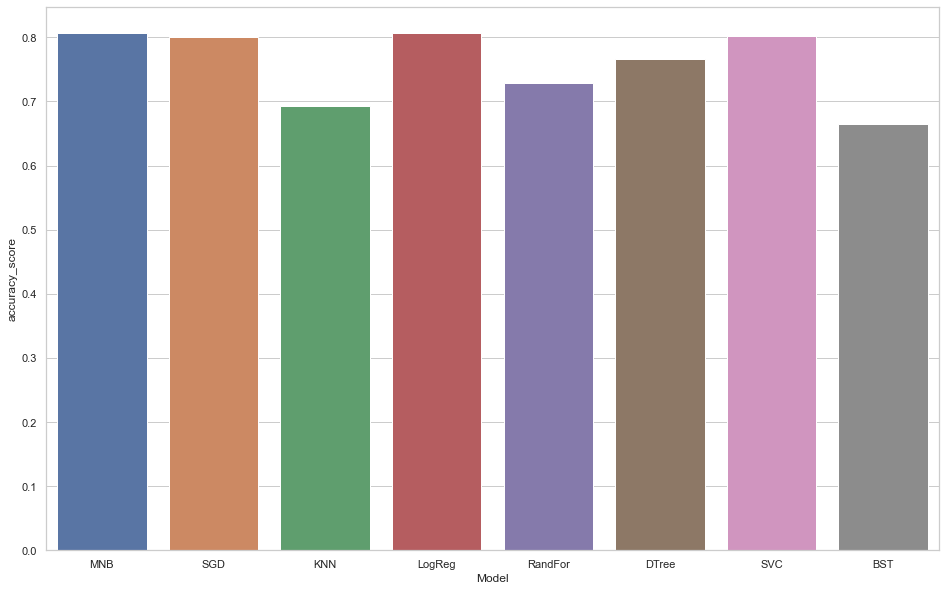

In [40]:
plt.figure(figsize = (16,10)) #plot the accuracy scores
sns.barplot(x=df['Model'], y=df['accuracy_score'], data=df)
plt.show()

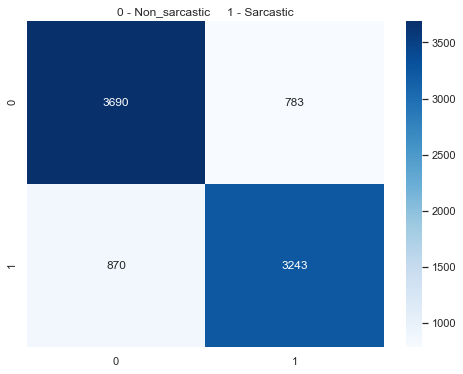

In [41]:
# Using counfusion matrix for best model(Logistic Regression)
from sklearn.metrics import confusion_matrix,classification_report
conf_mtx=confusion_matrix(y_pred4,y_test)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mtx,annot=True,fmt='d',cmap='Blues')
plt.title("0 - Non_sarcastic     1 - Sarcastic")
plt.show()